In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [2]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


### Uso típico de UMAP: reducción de dimensiones no supervisada

referencia: https://umap-learn.readthedocs.io/en/latest/basic_usage.html 

In [3]:
#Seleccionar Features e ignorar target
penguin_data = penguins[["bill_length_mm",
                         "bill_depth_mm",
                         "flipper_length_mm",
                         "body_mass_g"]].values

scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

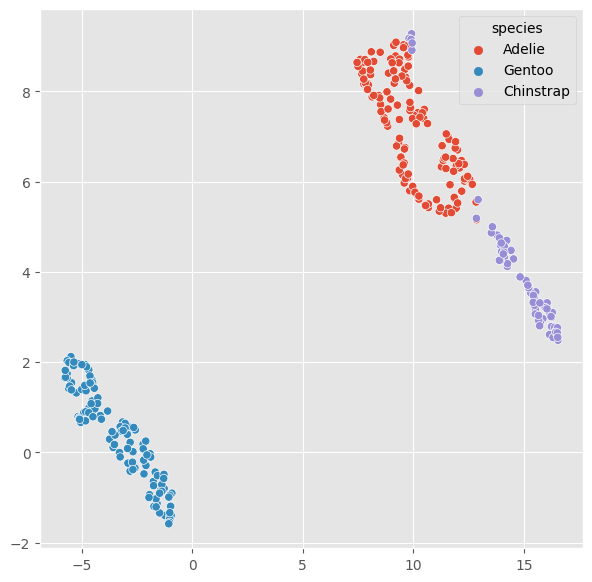

In [4]:
#Producir embedding sobre toda la data (Out of the box hyperparams)
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_penguin_data)
plt.figure(figsize = (7,7))
sns.scatterplot(x = embedding[:,0], 
                y = embedding[:,1],
                hue = penguins['species'] #Target = 'species'
                );

Los dos principales hiperparámetros a vigilar son 'n_neighbors' y 'min_dist':

* n_neighbors: mientras mayor sea este hiperparámetro, más global ('big picture') la estructura que captura UMAP en el embedding.
* min_dist: mientras mayor sea este hiperparámetro, mayor separación tendrán los puntos en el embedding.

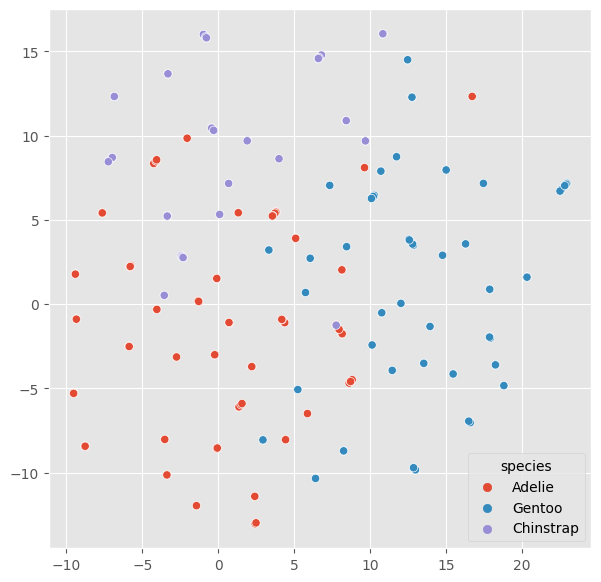

In [5]:
#Low n_neighbors, low min_dist
reducer = umap.UMAP(n_neighbors=2, min_dist=0.0, n_components=2, random_state=42)
embedding = reducer.fit_transform(scaled_penguin_data)
plt.figure(figsize = (7,7))
sns.scatterplot(x = embedding[:,0], y = embedding[:,1], hue = penguins['species']);

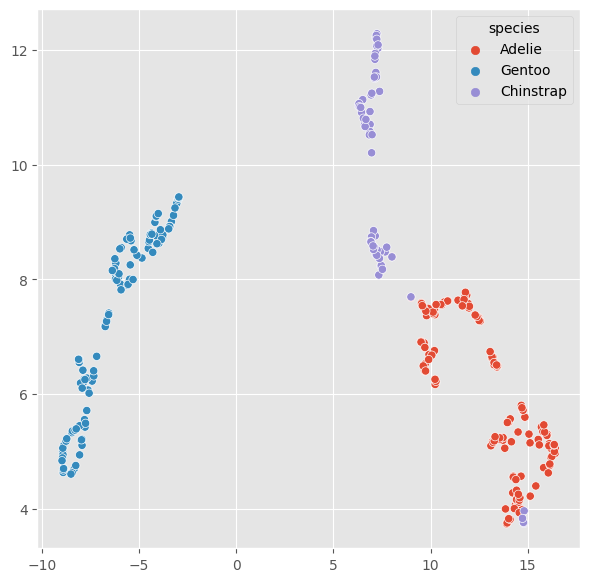

In [6]:
#High n_neighbors, low min_dist
reducer = umap.UMAP(n_neighbors=7, min_dist=0.0, n_components=2, random_state=42)
embedding = reducer.fit_transform(scaled_penguin_data)
plt.figure(figsize = (7,7))
sns.scatterplot(x = embedding[:,0], y = embedding[:,1], hue = penguins['species']);

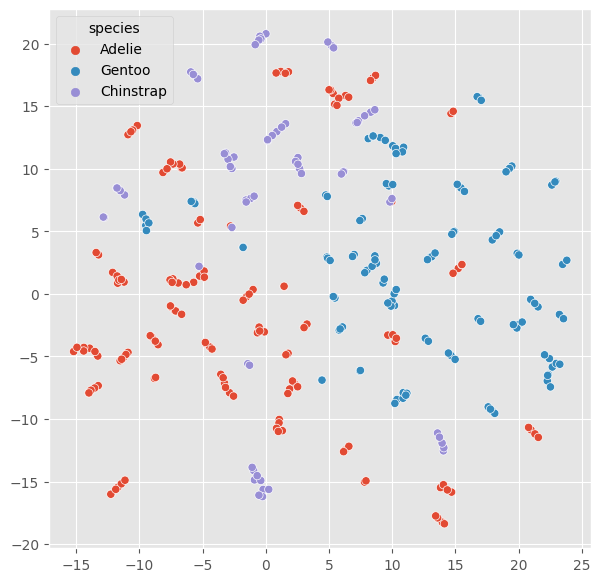

In [7]:
#Low n_neighbors, high min_dist
reducer = umap.UMAP(n_neighbors=2, min_dist=0.75, n_components=2, random_state=42)
embedding = reducer.fit_transform(scaled_penguin_data)
plt.figure(figsize = (7,7))
sns.scatterplot(x = embedding[:,0], y = embedding[:,1], hue = penguins['species']);

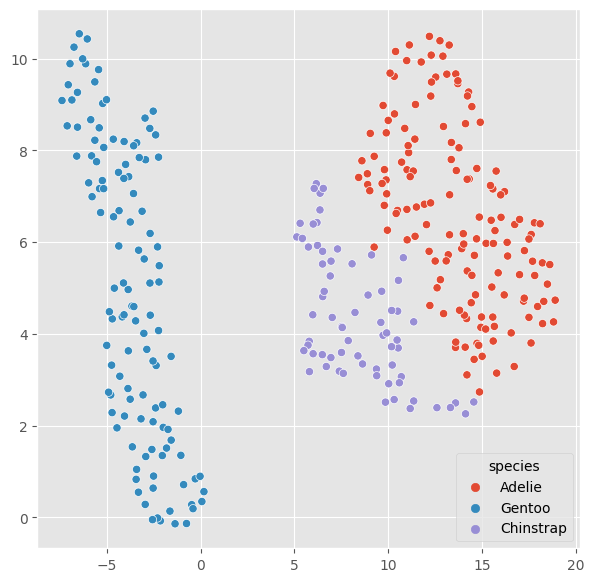

In [8]:
#High n_neighbors, high min_dist
reducer = umap.UMAP(n_neighbors=7, min_dist=0.75, n_components=2, random_state=42)
embedding = reducer.fit_transform(scaled_penguin_data)
plt.figure(figsize = (7,7))
sns.scatterplot(x = embedding[:,0], y = embedding[:,1], hue = penguins['species']);

### UMAP supervisado y Metric Learning

Se utiliza como un modelo predictivo para poder hacer embeddings sobre nuevos datos. Sirve para medir drift o bien cuando UMAP se usa para compresión de información más que para solo visualizar en 2D o 3D (por, ejemplo, si usáramos UMAP para mapear 50 features a 25).

referencia: https://umap-learn.readthedocs.io/en/latest/transform.html, https://umap-learn.readthedocs.io/en/latest/supervised.html

In [9]:
train_idx = np.random.choice(range(len(scaled_penguin_data)), size = 170, replace = False)
test_idx = list(set(range(len(scaled_penguin_data))) - set(train_idx))
xtrain, ytrain = scaled_penguin_data[train_idx], penguins['species'].values[train_idx]

xtest, ytest = scaled_penguin_data[test_idx], penguins['species'].values[test_idx]

In [10]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
le.fit(ytrain)
numeric_labels_train = le.transform(ytrain)
numeric_labels_test = le.transform(ytest)


#Out of the box hyperparams
mapper = umap.UMAP().fit(xtrain, y=numeric_labels_train)
train_embedding = mapper.embedding_

test_embedding = mapper.transform(xtest)

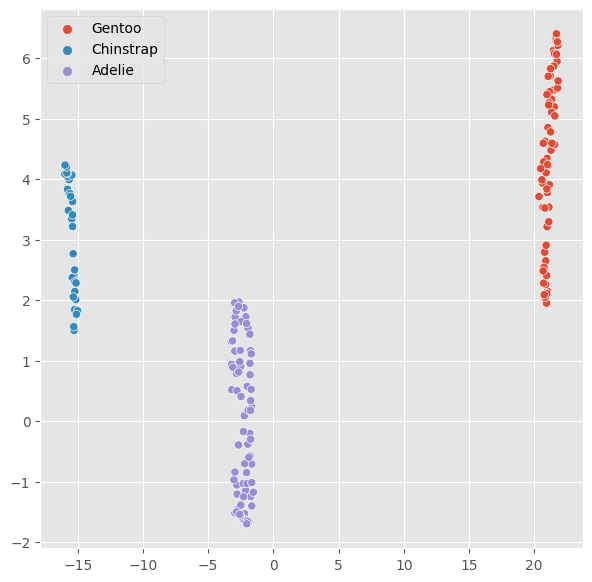

In [11]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = train_embedding[:,0], 
                y = train_embedding[:,1],
                hue = le.inverse_transform(numeric_labels_train) #Target = 'species'
                );

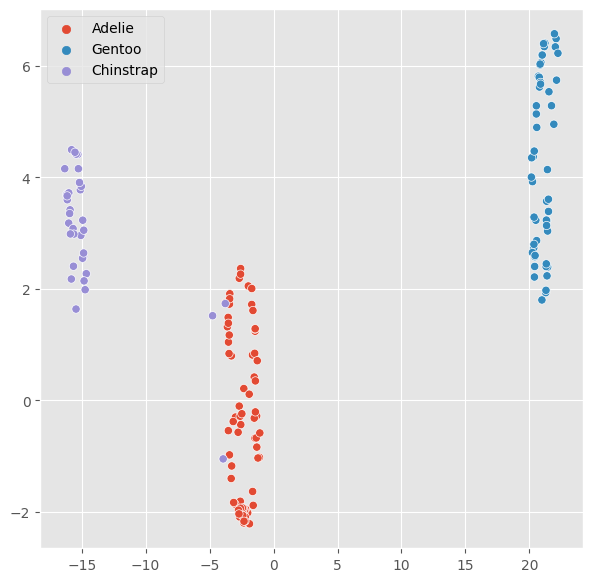

In [12]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = test_embedding[:,0], 
                y = test_embedding[:,1],
                hue = le.inverse_transform(numeric_labels_test) #Target = 'species'
                );